In [264]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import re

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [265]:
# Read json file
df = pd.read_json('logins.json').set_index('login_time')
df

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


In [266]:
#Check date column properties, etc. 
df.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [267]:
# Add a counter column

df.index = pd.to_datetime(df.index)
df['logged'] = 1

### Quarter-Hour

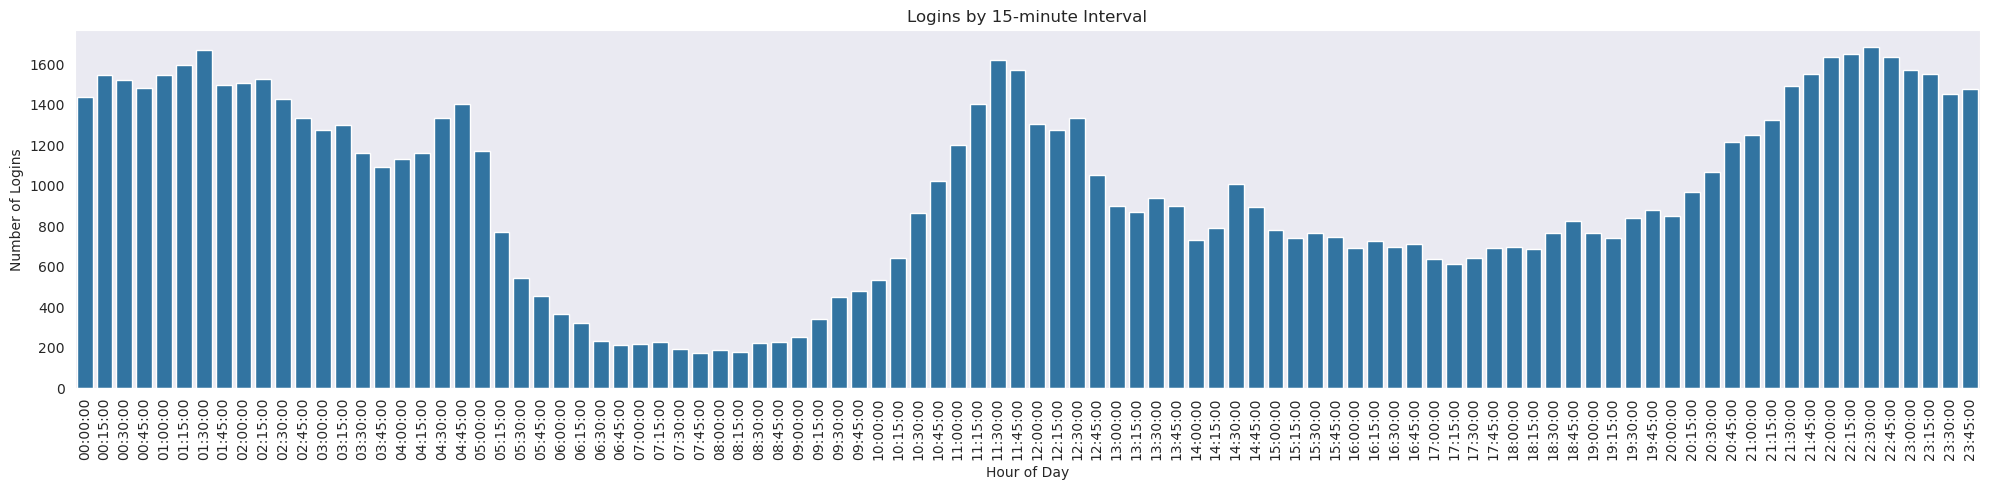

In [268]:
# Count total logins by quarter hour

logins_by_quarter = df.groupby(df.index.floor('15min').time).sum()

# PLot logins by quarter hour

plt.figure(figsize=(20, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_quarter.index,
            y=logins_by_quarter['logged'] )
plt.title('Logins by 15-minute Interval')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [269]:
# Quarter hourly logins

logins_quarterhourly = df.resample('15min').count()

In [270]:
# Verify datetime index 

logins_quarterhourly.index

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15min')

In [271]:
# Check for nulls 

logins_quarterhourly.isna().sum()

logged    0
dtype: int64

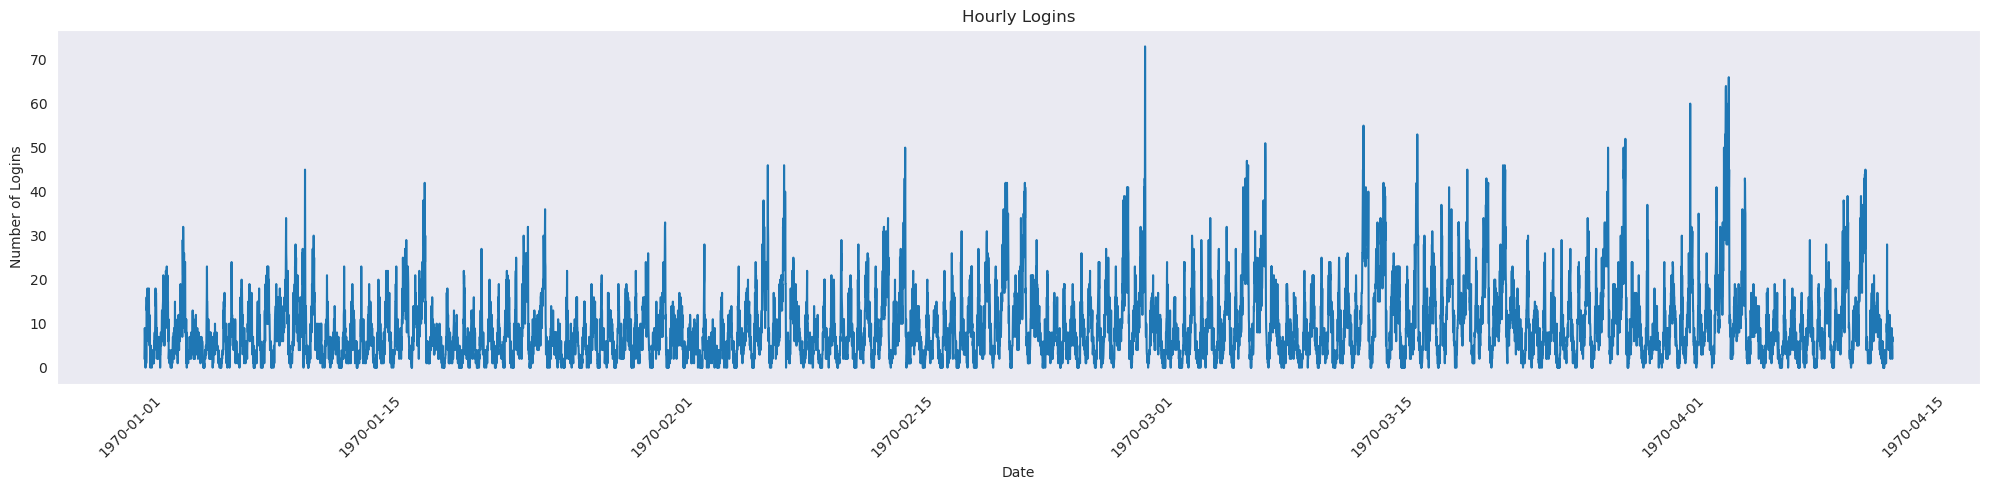

In [272]:
# Plot the hourly logins

plt.figure(figsize=(20, 5))
sns.lineplot(x=logins_quarterhourly.index, y=logins_quarterhourly['logged'])
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

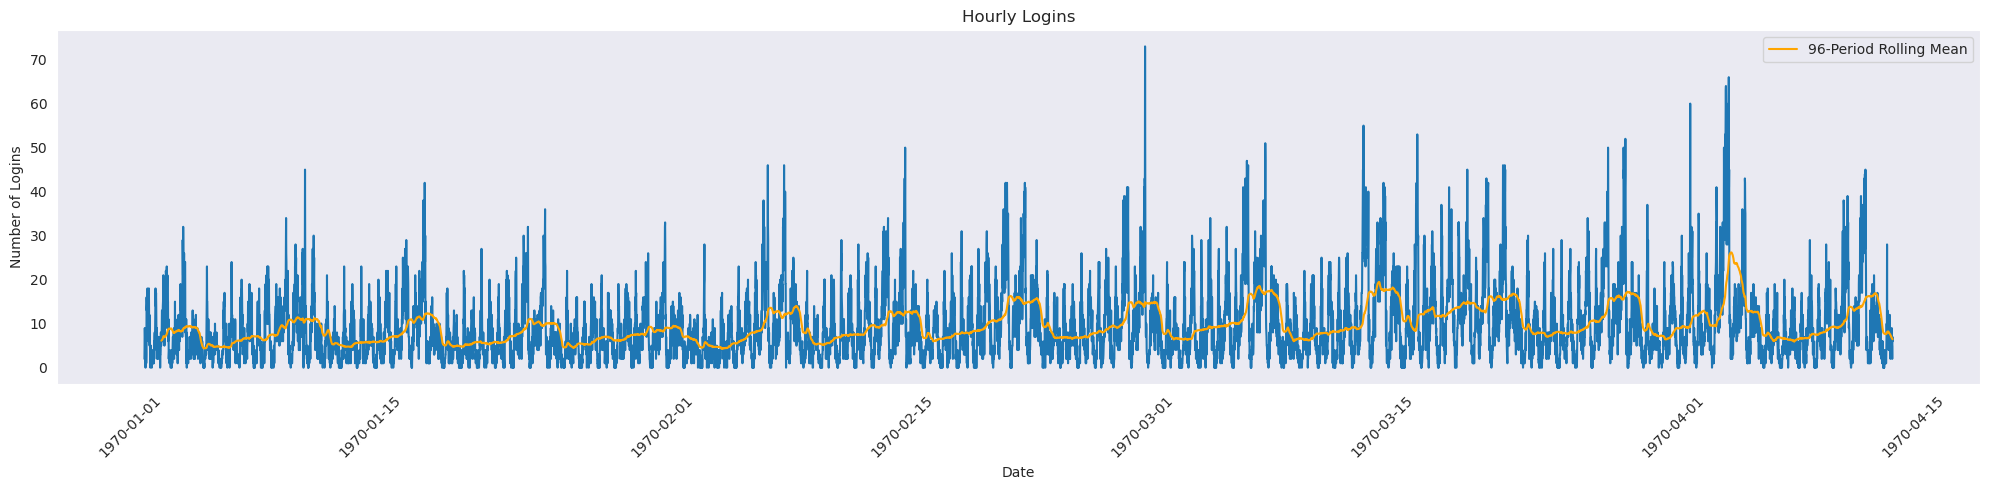

In [273]:
# Quarter hourly logins with rolling mean

trend = logins_quarterhourly.rolling(window=96).mean()

plt.figure(figsize=(20, 5))
sns.lineplot(x=logins_quarterhourly.index, y=logins_quarterhourly['logged'])
sns.lineplot(x=trend.index, y=trend['logged'], color='orange', label='96-Period Rolling Mean')
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [274]:
# Date and Time with the most logins

print( f'Date and time with the highest logins: {logins_quarterhourly['logged'].idxmax()}' )

Date and time with the highest logins: 1970-03-01 04:30:00


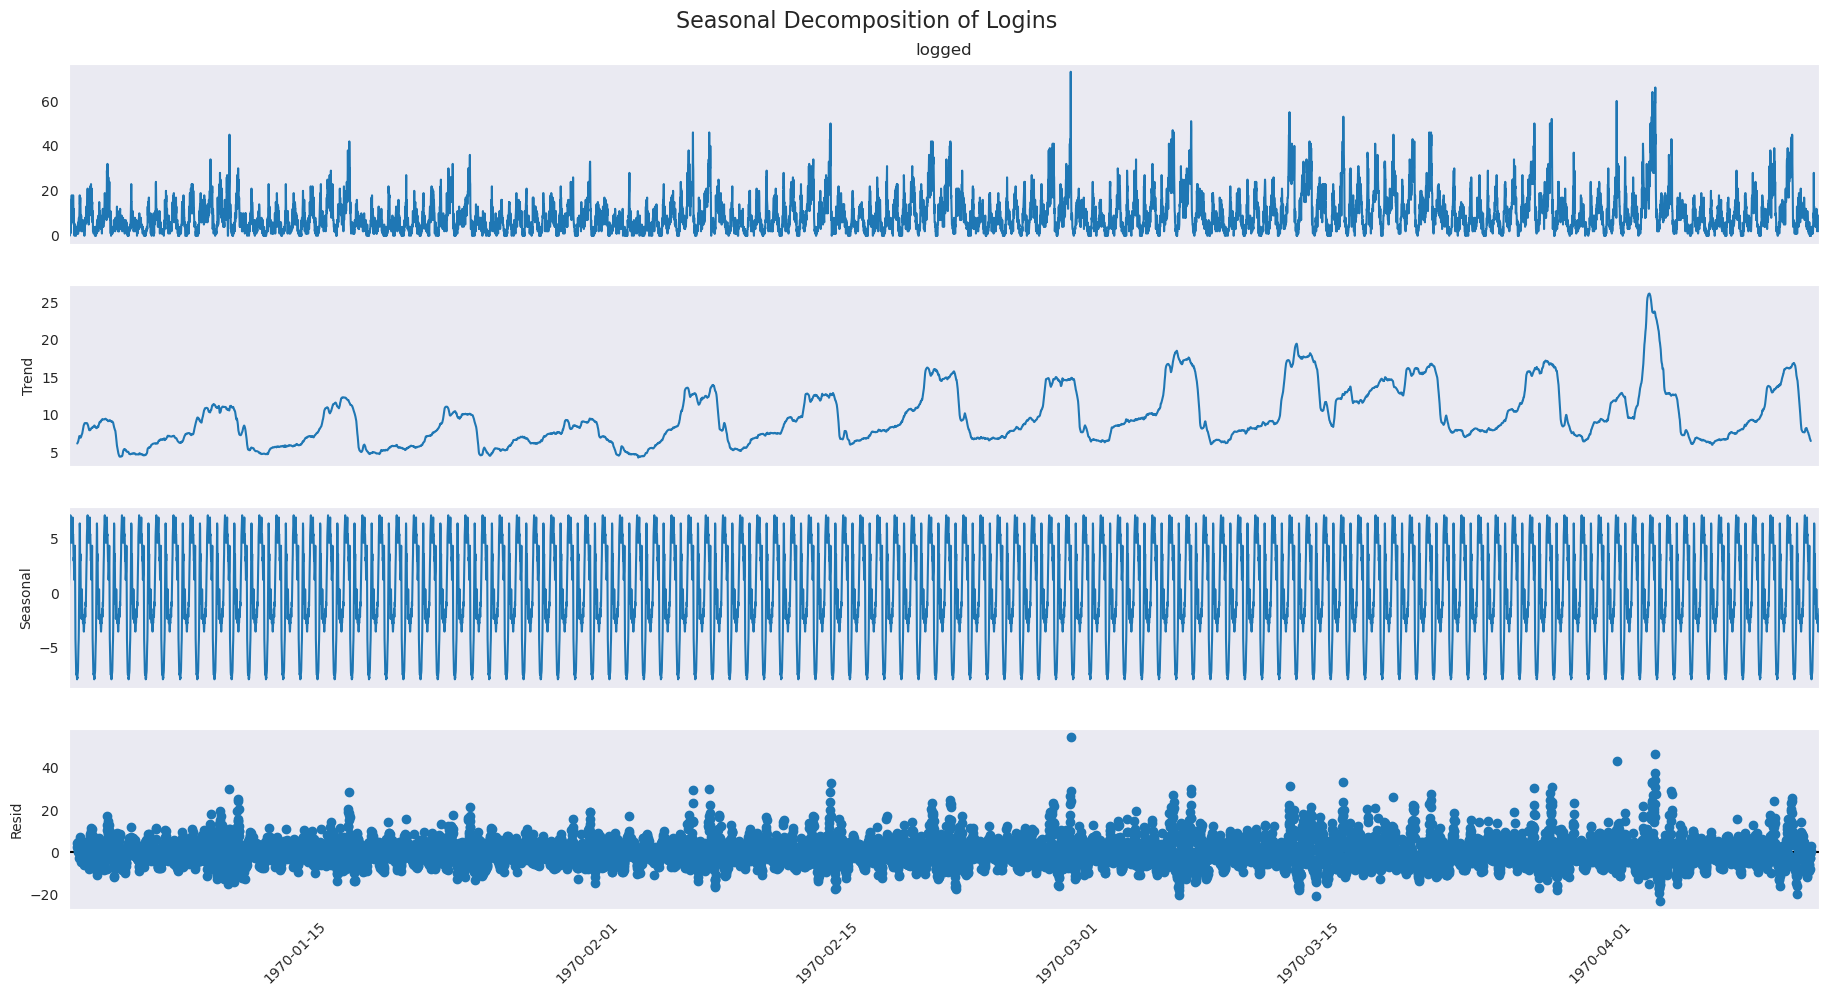

In [275]:
# Seasonal decomposition of quarter hourly logins data

from statsmodels.tsa.seasonal import seasonal_decompose

# use period = 96 quarter hours in a day. 
decomposition = seasonal_decompose(logins_quarterhourly['logged'], model='additive', period=96)
fig = decomposition.plot()
fig.set_size_inches(20, 10)
plt.suptitle('Seasonal Decomposition of Logins', fontsize=16)
plt.xticks(rotation=45)
plt.show() 

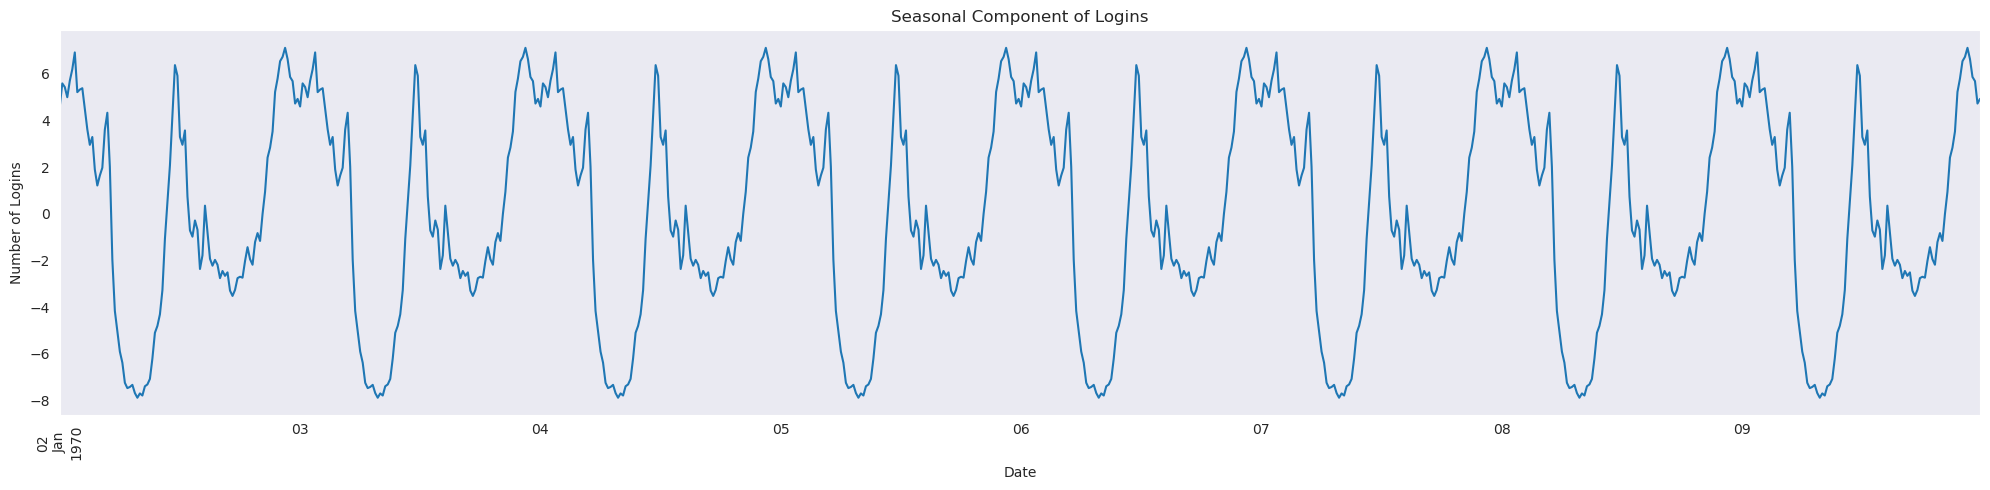

In [276]:
# Zoom in on the seasonal component of the quarter hourly logins

plt.figure(figsize=(20, 5))
decomposition.seasonal[16:784].plot()
plt.title('Seasonal Component of Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [277]:
def adf_test(series):
    '''
    UDF: Perform Augmented Dickey-Fuller test to check for stationarity
    Parameters
    ----------
    series : pd.Series
        The time series to test for stationarity.
    Returns
    -------
    None. Prints the ADF test statistic, p-value, number of lags used, and number of observations used.
    Also prints whether the null hypothesis of non-stationarity is rejected or not.
    
    '''
    result = adfuller(series)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', '#Observations Used']
    for label, val in zip(labels, result):
        print(f'{label} : {val}')
    if result[1] <= 0.05:
        print("Reject the null hypothesis - the time series is stationary")
    else:
        print("Fail to reject the null hypothesis - the time series is non-stationary")

ADF Test Statistic : -10.337954309060434
p-value : 2.7323966542231624e-18
#Lags Used : 38
#Observations Used : 9749
Reject the null hypothesis - the time series is stationary


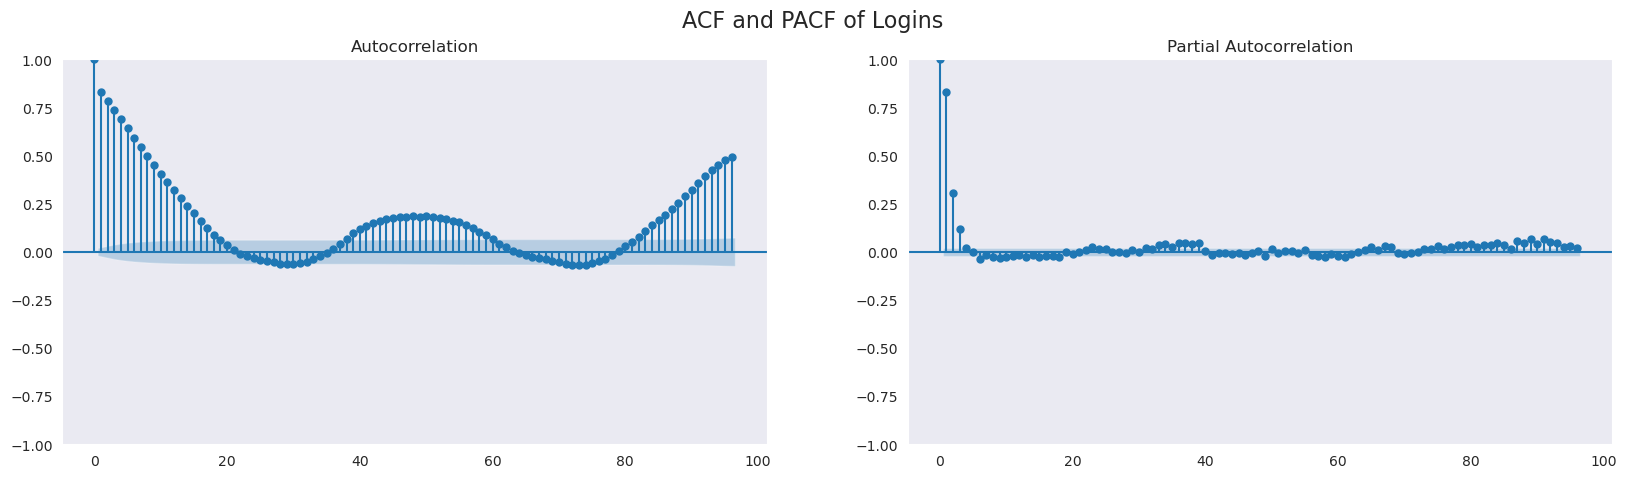

In [278]:
# Perform ADF test on the quarter hourly logins

adf_test(logins_quarterhourly['logged'])


# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plot_acf(logins_quarterhourly['logged'], lags=96, ax=ax[0])
plot_pacf(logins_quarterhourly['logged'], lags=96, ax=ax[1])
plt.suptitle('ACF and PACF of Logins', fontsize=16)
plt.show()

Hourly

Average logins per hour:  38.0


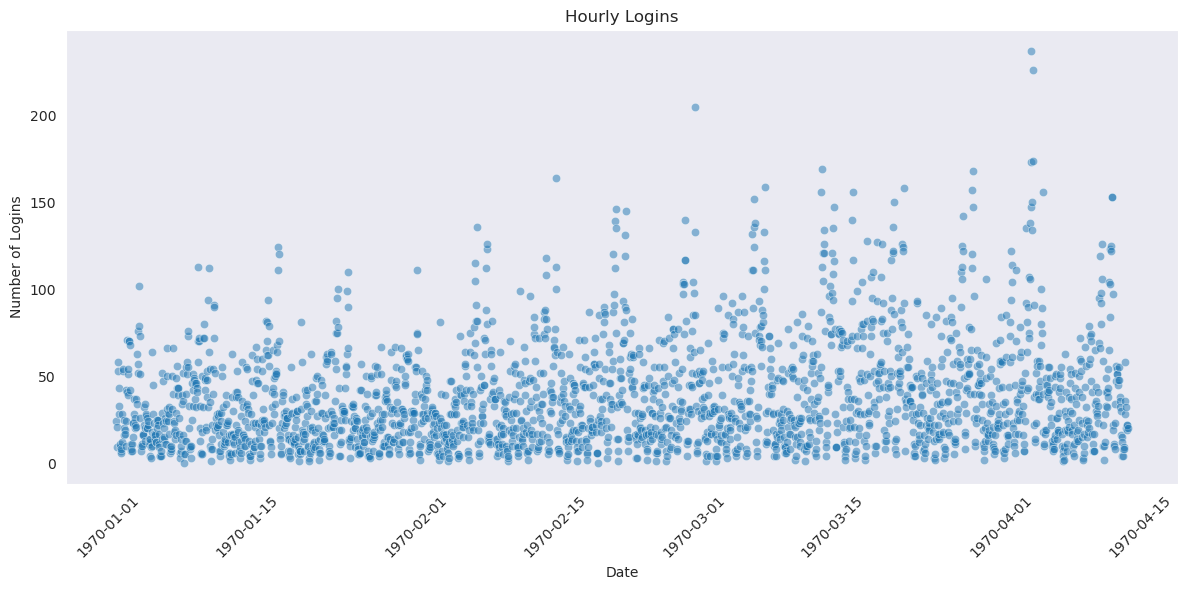

In [279]:
# Resample to hourly - Logins per hour

logins_hourly = df.resample('h').count()

avg_logins_hourly = round(logins_hourly['logged'].mean(),0)
print('Average logins per hour: ', avg_logins_hourly)

# Plot the hourly counts
sns.set_style('dark', {'axes.grid': False})
plt.figure(figsize=(12, 6))
sns.scatterplot(x=logins_hourly.index, y=logins_hourly['logged'], marker='o', alpha=0.5)
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

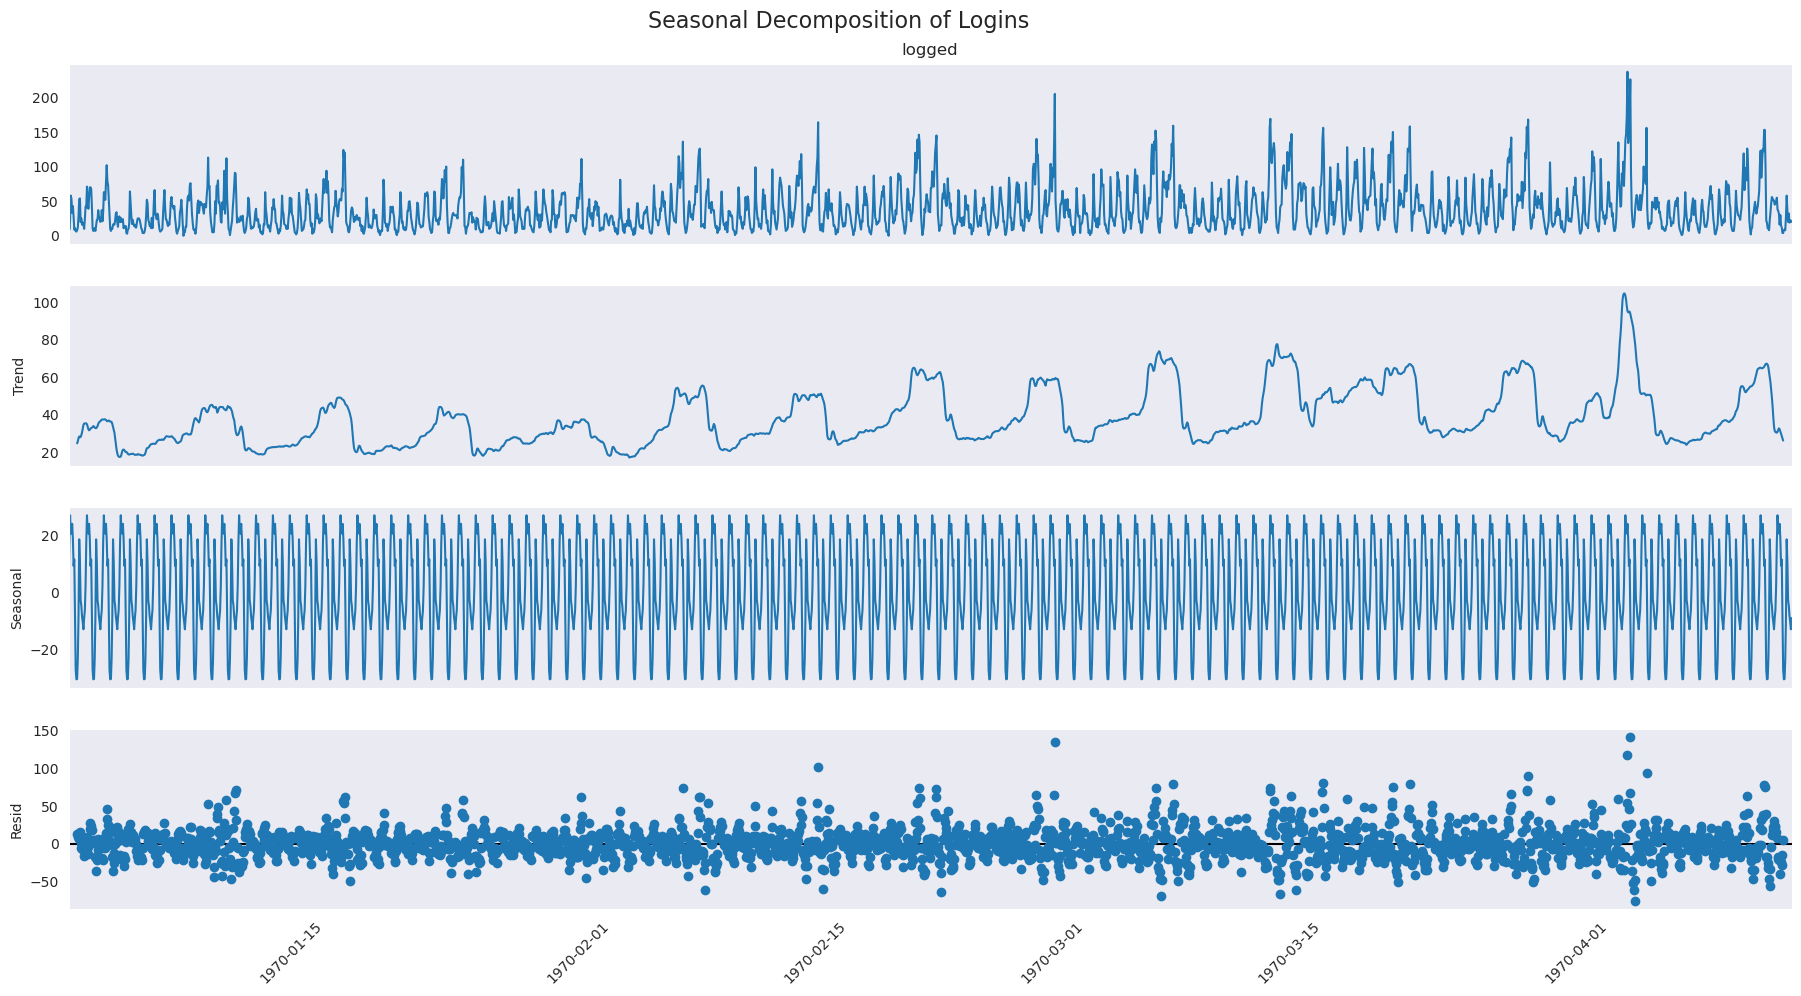

In [280]:
# Seasonal decomposition - Hourly logins

# use period = 24 hours. 
decomposition = seasonal_decompose(logins_hourly['logged'], model='additive', period=24)
fig = decomposition.plot()
fig.set_size_inches(20, 10)
plt.suptitle('Seasonal Decomposition of Logins', fontsize=16)
# plt.xlim(logins_hourly.index[4], logins_hourly.index[172])
plt.xticks(rotation=45)
plt.show() 

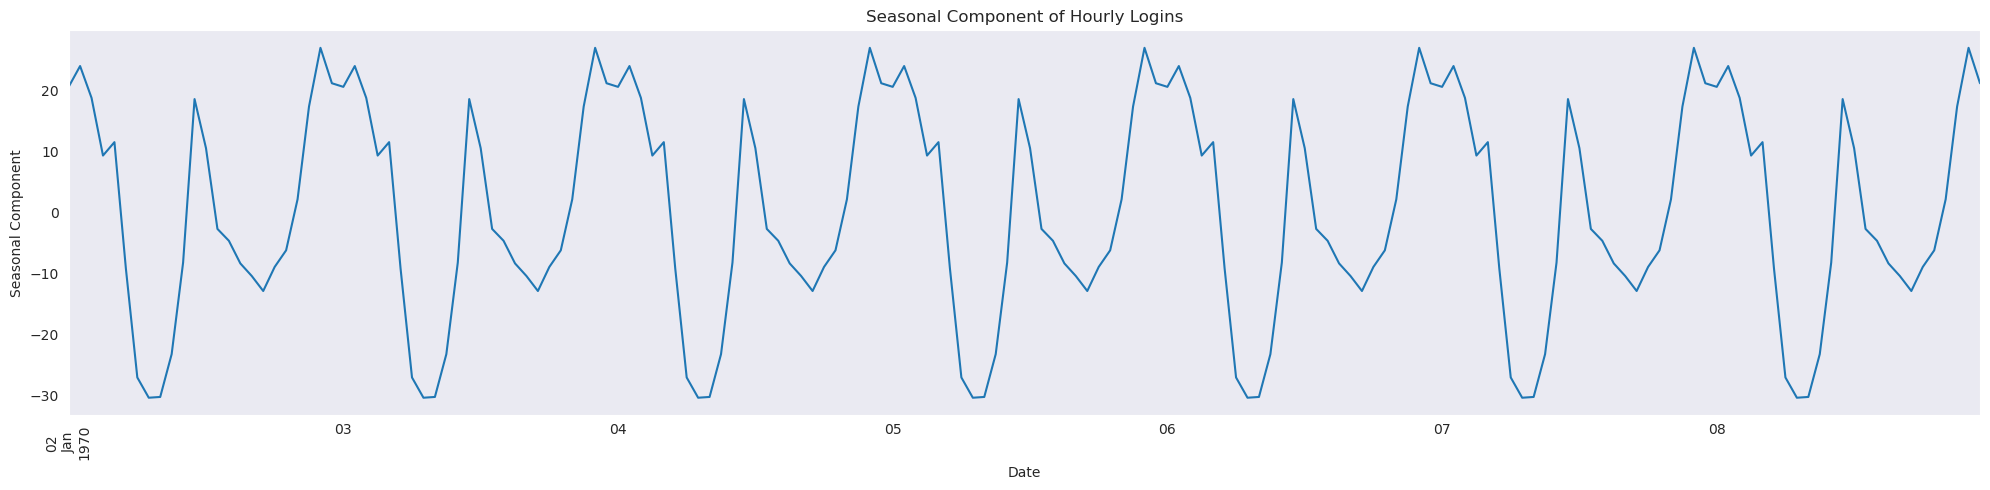

In [281]:
# Zooming in on the seasonal component for a specific date range

plt.figure(figsize=(20, 5))
decomposition.seasonal[4:172].plot()
plt.title('Seasonal Component of Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

ADF Test Statistic : -5.4616429583400645
p-value : 2.510922984630461e-06
#Lags Used : 25
#Observations Used : 2421
Reject the null hypothesis - the time series is stationary


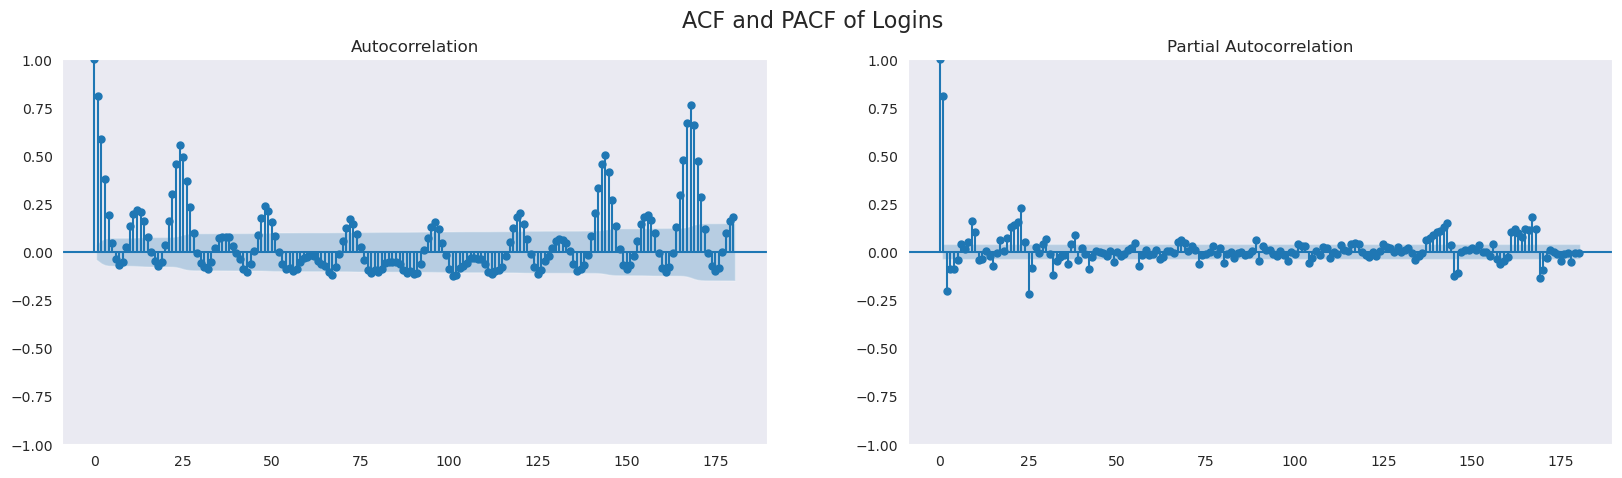

In [282]:
# Stationarity test + ACF + PACF on hourly logins

adf_test(logins_hourly['logged'])

# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plot_acf(logins_hourly['logged'], lags=180, ax=ax[0])
plot_pacf(logins_hourly['logged'], lags=180, ax=ax[1])
plt.suptitle('ACF and PACF of Logins', fontsize=16)
plt.show()

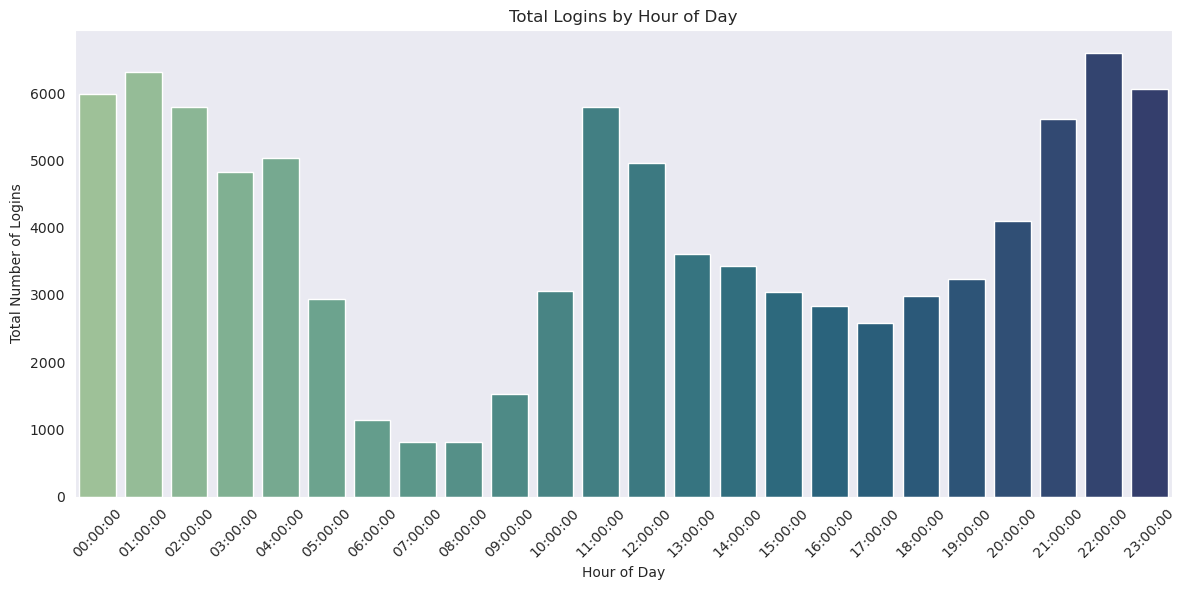

In [283]:
# Total logins by hour

logins_by_hour = logins_hourly.groupby(logins_hourly.index.hour).sum()

# convert index to time

logins_by_hour.index = pd.to_datetime(logins_by_hour.index, format='%H').time

# Logins by hour of day

plt.figure(figsize=(12, 6))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_hour.index, y=logins_by_hour['logged'], palette='crest', hue=logins_by_hour.index, legend=False)
plt.title('Total Logins by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [284]:
# Get which hour of the day and day of the week has the most logins

# Extract Time Variables

logins_hourly['year'] = logins_hourly.index.year
logins_hourly['month'] = logins_hourly.index.month
logins_hourly['day'] = logins_hourly.index.day
logins_hourly['hour'] = logins_hourly.index.hour
logins_hourly['weekday'] = logins_hourly.index.day_name()
logins_hourly['weekday_numeric'] = logins_hourly.index.weekday

# 5 & 6 is for Saturday and Sunday
logins_hourly['is_weekend'] = logins_hourly.index.weekday > 4

In [285]:
logins_hourly

,logged,year,month,day,hour,weekday,weekday_numeric,is_weekend
login_time,,,,,,,,
1970-01-01 20:00:00,24,1970,1,1,20,Thursday,3,False
1970-01-01 21:00:00,9,1970,1,1,21,Thursday,3,False
1970-01-01 22:00:00,21,1970,1,1,22,Thursday,3,False
1970-01-01 23:00:00,58,1970,1,1,23,Thursday,3,False
1970-01-02 00:00:00,53,1970,1,2,0,Friday,4,False
...,...,...,...,...,...,...,...,...
1970-04-13 14:00:00,32,1970,4,13,14,Monday,0,False
1970-04-13 15:00:00,19,1970,4,13,15,Monday,0,False
1970-04-13 16:00:00,22,1970,4,13,16,Monday,0,False


In [291]:
# Get the day of the week with the most logins
gby_weekday_hour = logins_hourly.groupby([logins_hourly['weekday_numeric'], logins_hourly['hour']])['logged'].agg('sum').reset_index()

In [292]:
gby_weekday_hour

,weekday_numeric,hour,logged
0,0,0,531
1,0,1,414
2,0,2,312
3,0,3,236
4,0,4,206
...,...,...,...
163,6,19,632
164,6,20,612
165,6,21,625
166,6,22,583


In [293]:
# Map weekday_numeric to weekday names
# gby_1 = gby_1.reset_index()
gby_weekday_hour['weekday'] = gby_weekday_hour['weekday_numeric'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
gby_weekday_hour

,weekday_numeric,hour,logged,weekday
0,0,0,531,Monday
1,0,1,414,Monday
2,0,2,312,Monday
3,0,3,236,Monday
4,0,4,206,Monday
...,...,...,...,...
163,6,19,632,Sunday
164,6,20,612,Sunday
165,6,21,625,Sunday
166,6,22,583,Sunday


In [294]:
gby_weekday_hour = gby_weekday_hour.reset_index()
# gby_weekday_hour = gby_weekday_hour.sort_values(by='logged', ascending=False)
# gby_weekday_hour.head(20) 

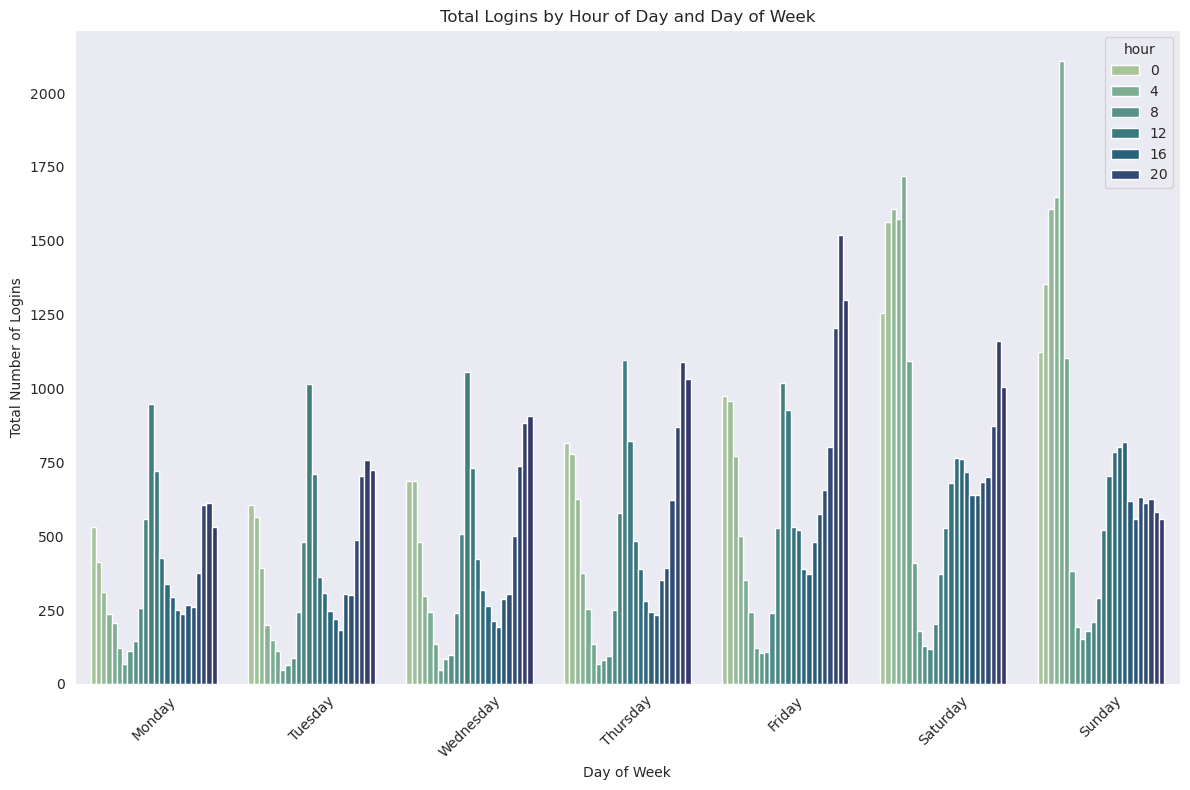

In [296]:
plt.figure(figsize=(12, 8))
sns.barplot(x=gby_weekday_hour['weekday'], y=gby_weekday_hour['logged'], hue=gby_weekday_hour['hour'], palette='crest')
plt.title('Total Logins by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

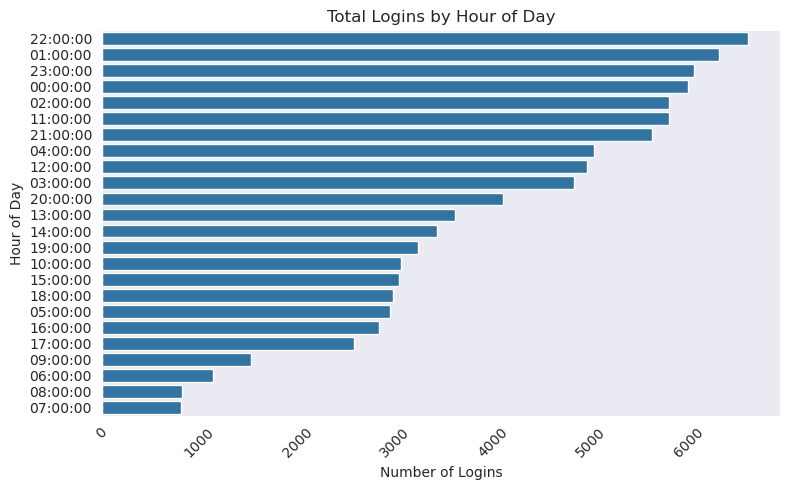

In [188]:
#  Total logins by hour of day - sorted

plt.figure(figsize=(8, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(y=logins_by_hour.sort_values('logged', ascending=False).index,
            x=logins_by_hour.sort_values('logged', ascending=False)['logged'] )
plt.title('Total Logins by Hour of Day')
plt.ylabel('Hour of Day')
plt.xlabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Custom Daily

In [189]:
# Check if each daily record is complete - have 24 hours per day

daily_hour_count = logins_hourly.groupby(logins_hourly.index.date)['logged'].agg({'count', 'sum'})
daily_hour_count['count'].value_counts()

count
24    101
4       1
19      1
Name: count, dtype: int64

In [190]:
# Get the average number of logins per day

avg_login_daily = round(daily_hour_count['sum'].mean(),0)
print('Average daily logins: ', avg_login_daily)

Average daily logins:  904.0


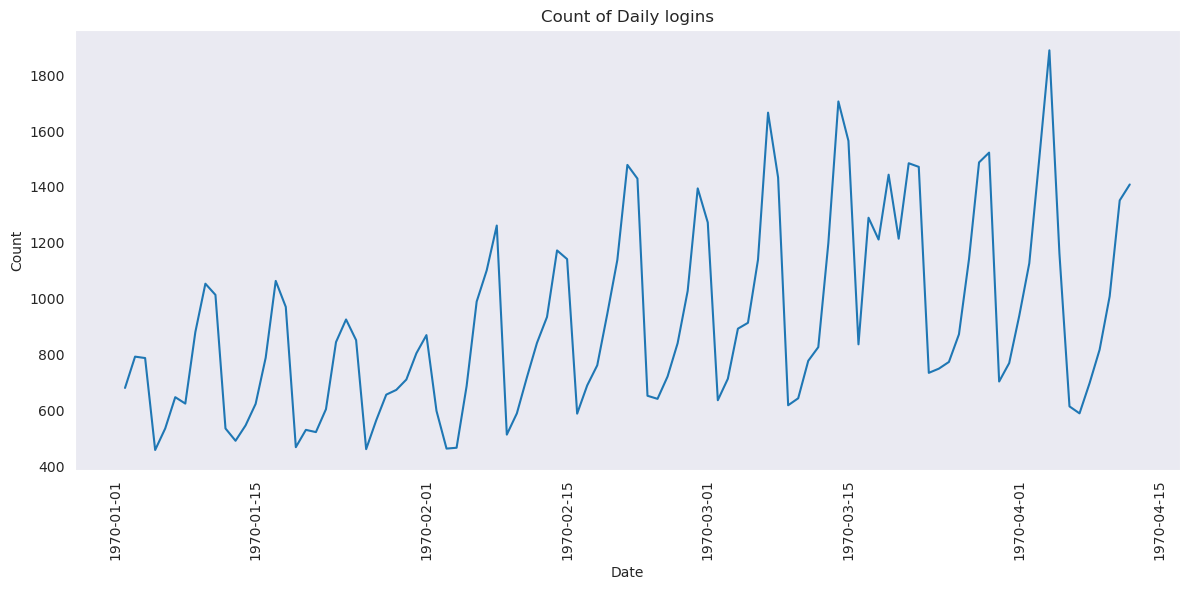

In [191]:
# Drop incomplete daily logins dates with less than 24 hours of logins recorded. 

daily_hour_count = daily_hour_count[daily_hour_count['count'] == 24]

# Plot total count logins daily (only those with 24 hours of data)

sns.set_style('dark')
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_hour_count, x=daily_hour_count.index, y='sum', markers='o',)
plt.title('Count of Daily logins')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()

### Standard Daily


In [192]:
# Resample to daily

logins_daily = df.resample('D').count()

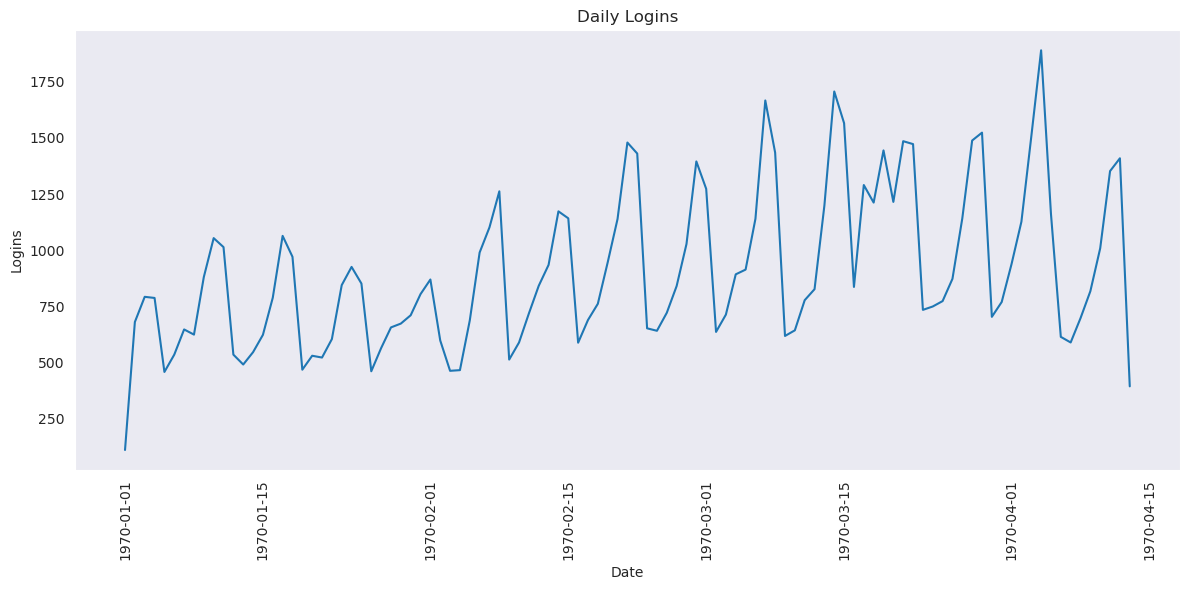

In [193]:
# Plot daily logins

sns.set_style('dark')
plt.figure(figsize=(12, 6))
sns.lineplot(x=logins_daily.index, y=logins_daily['logged'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Logins')
plt.title('Daily Logins')
plt.tight_layout()
plt.show()

In [194]:
logins_daily

,logged
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
...,...
1970-04-09,818
1970-04-10,1009
1970-04-11,1352


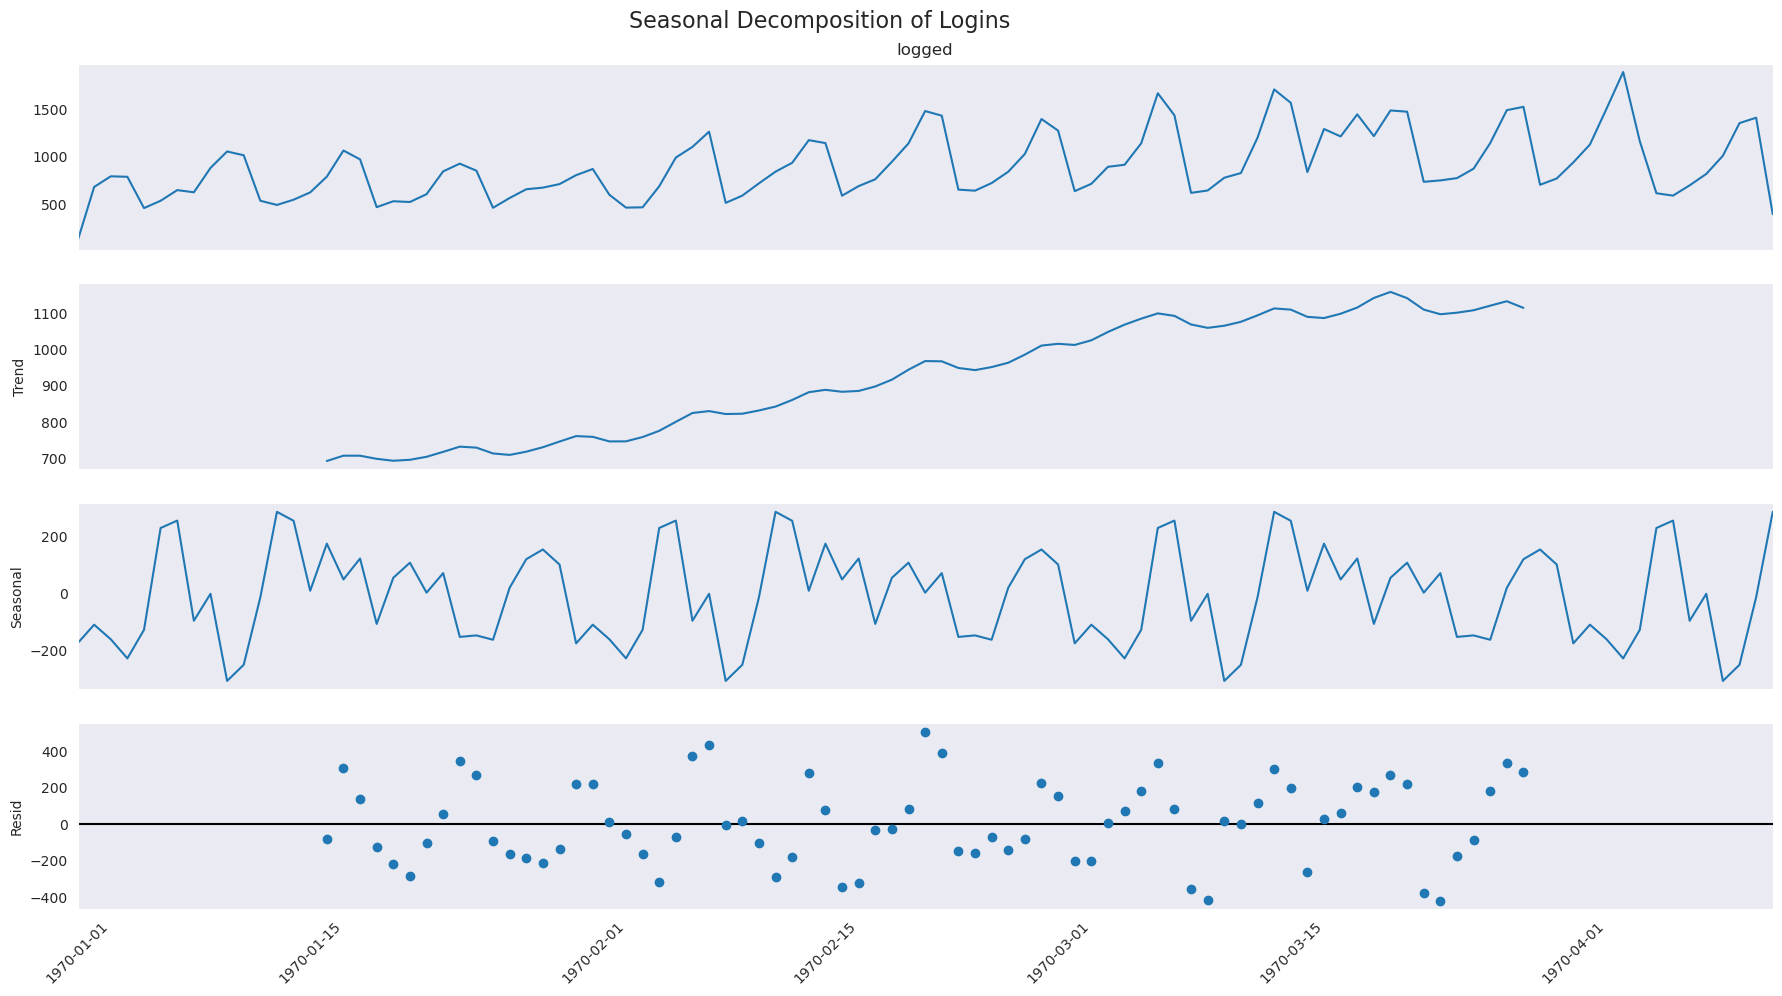

In [195]:
# use period = 30 days. 

decomposition = seasonal_decompose(logins_daily['logged'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(20, 10)
plt.suptitle('Seasonal Decomposition of Logins', fontsize=16)
plt.xticks(rotation=45)
plt.show() 

ADF Test Statistic : -1.4033164919219885
p-value : 0.5806851218557991
#Lags Used : 13
#Observations Used : 89
Fail to reject the null hypothesis - the time series is non-stationary


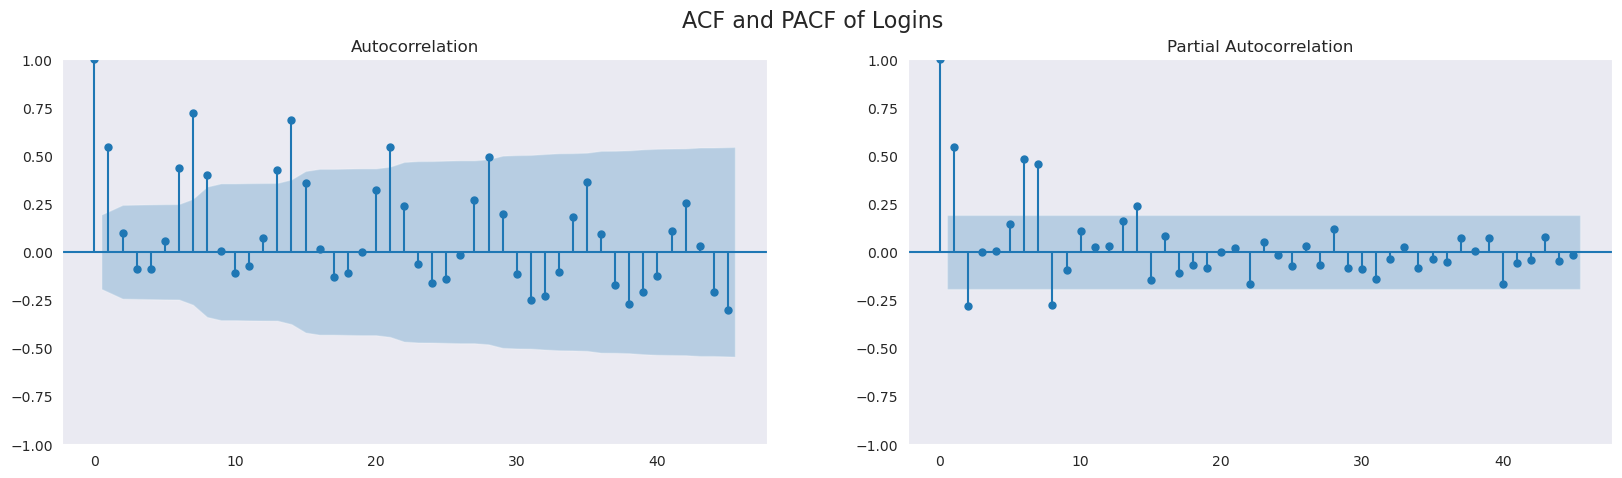

In [196]:

adf_test(logins_daily['logged'])
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
plot_acf(logins_daily['logged'], lags=45, ax=ax[0])
plot_pacf(logins_daily['logged'], lags=45, ax=ax[1])
plt.suptitle('ACF and PACF of Logins', fontsize=16)
plt.show()

In [197]:
logins_by_day = logins_daily.groupby(logins_daily.index.day_name()).sum()
logins_by_day

,logged
login_time,
Friday,15208
Monday,8823
Saturday,19377
Sunday,18167
Thursday,11960
Tuesday,9268
Wednesday,10339


In [ ]:
# Extract Time Variables

logins_daily['year'] = logins_daily.index.year
logins_daily['month'] = logins_daily.index.month
logins_daily['day'] = logins_daily.index.day
logins_daily['weekday'] = logins_daily.index.day_name()
logins_daily['weekday_numeric'] = logins_daily.index.weekday


# 5 & 6 is for Saturday and Sunday
logins_daily['is_weekend'] = logins_daily.index.weekday > 4

logins_daily

,logged,year,month,day,weekday,weekday_numeric,is_weekend
login_time,,,,,,,
1970-01-01,112,1970,1,1,Thursday,3,False
1970-01-02,681,1970,1,2,Friday,4,False
1970-01-03,793,1970,1,3,Saturday,5,True
1970-01-04,788,1970,1,4,Sunday,6,True
1970-01-05,459,1970,1,5,Monday,0,False
...,...,...,...,...,...,...,...
1970-04-09,818,1970,4,9,Thursday,3,False
1970-04-10,1009,1970,4,10,Friday,4,False
1970-04-11,1352,1970,4,11,Saturday,5,True


In [ ]:
# Which day of the week has the most logins

logins_by_day = logins_daily.groupby(['weekday'])['logged'].agg('sum')
logins_by_day = logins_by_day.sort_values(ascending=False)


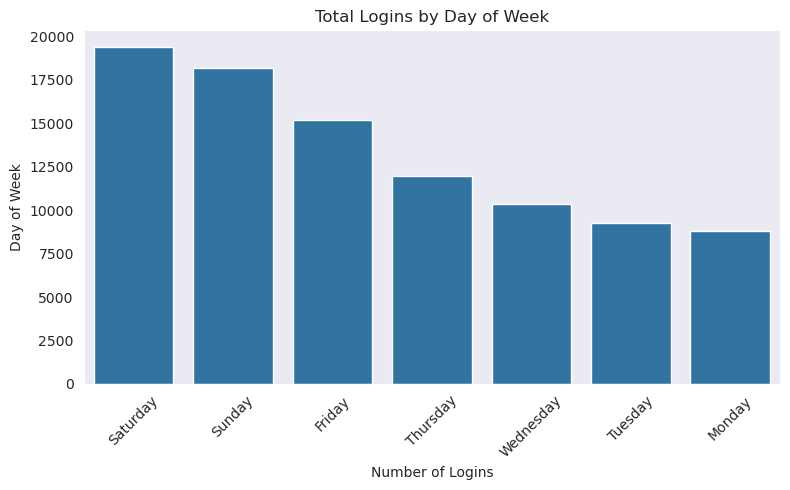

In [202]:
# Plot total logins by day of week

plt.figure(figsize=(8, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_day.index,
            y=logins_by_day.values )
plt.title('Total Logins by Day of Week')
plt.ylabel('Day of Week')
plt.xlabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Standard Weekly

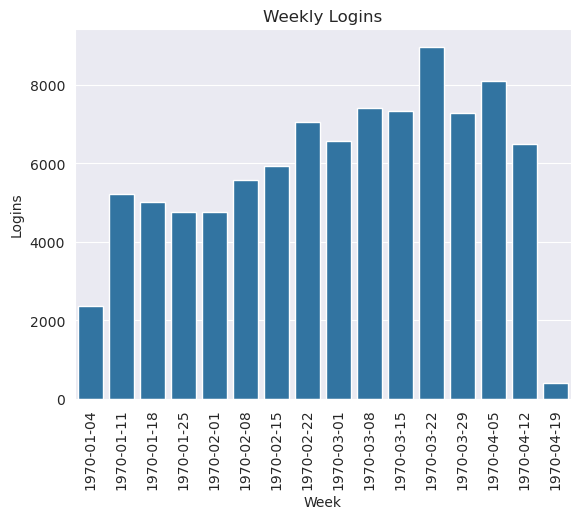

In [43]:
# Resample to weekly

weekly_counts = df.resample('W').count()

# Plot weekly logins

sns.set_style('darkgrid')
sns.barplot(x=weekly_counts.index, y=weekly_counts['logged'])
plt.xticks(rotation=90)
plt.xlabel('Week')
plt.ylabel('Logins')
plt.title('Weekly Logins')
plt.show()